# Loading Dataset

In [1]:
import pandas as pd

In [2]:
#Can be downloaded from (https://www.kaggle.com/hashbanger/musk-dataset)
names = pd.read_csv('musk_csv.csv')

In [3]:
data = pd.DataFrame(names)

In [4]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


# Pre-processing

In [5]:
import numpy as np

### Checking for missing values

In [6]:
# Dataset shape before removing missing values
data.shape

(6598, 170)

In [7]:
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [8]:
data.dropna()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [9]:
#Dataset shape after dropping missing values
data.shape

(6598, 170)

### Removing columns with correlation more than 92%

In [10]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]
df = data.drop(columns = to_drop)

In [11]:
# Data shape after removing columns with higher correlation
df.shape

(6598, 117)

### Splitting dataset in Train and Test (80:20)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train,test = train_test_split(df, random_state=50, test_size = 0.2)

In [14]:
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]

# Building Model

In [15]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
model=Sequential()
model.add(Dense(32, input_dim= 113, activation='relu'))
model.add(Dense(32, input_shape=(19,6,1), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling Model

In [17]:
# Loss = 'binary_crossentropy'
# Optimizer = 'Adam'

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Training Model

In [19]:
history = model.fit(Xtrain,Ytrain,batch_size=128,epochs=25,validation_data=(Xtest,Ytest))
score=model.evaluate(Xtest,Ytest,verbose=0)
print(score)

Epoch 1/25
42/42 [==============================] - 0s 8ms/step - loss: 0.8611 - accuracy: 0.8136 - val_loss: 0.2964 - val_accuracy: 0.8750
Epoch 2/25
42/42 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.8810 - val_loss: 0.2253 - val_accuracy: 0.9197
Epoch 3/25
42/42 [==============================] - 0s 5ms/step - loss: 0.2254 - accuracy: 0.9113 - val_loss: 0.1932 - val_accuracy: 0.9250
Epoch 4/25
42/42 [==============================] - 0s 5ms/step - loss: 0.1864 - accuracy: 0.9244 - val_loss: 0.1711 - val_accuracy: 0.9303
Epoch 5/25
42/42 [==============================] - 0s 4ms/step - loss: 0.1484 - accuracy: 0.9399 - val_loss: 0.1452 - val_accuracy: 0.9394
Epoch 6/25
42/42 [==============================] - 0s 5ms/step - loss: 0.1287 - accuracy: 0.9452 - val_loss: 0.1365 - val_accuracy: 0.9432
Epoch 7/25
42/42 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9547 - val_loss: 0.1308 - val_accuracy: 0.9447
Epoch 8/25
42/42 [==

# Visualizing Results

In [20]:
import matplotlib.pyplot as plt

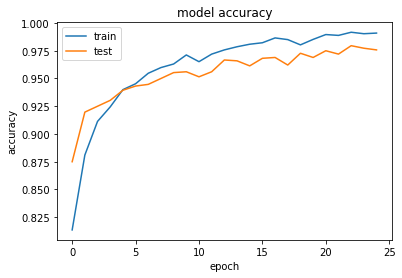

In [21]:
#Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy')
plt.show()

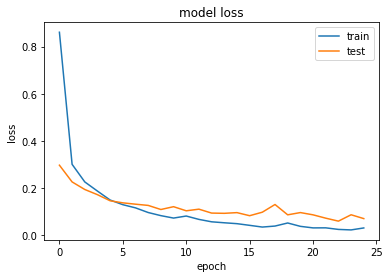

In [26]:
#Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('Loss')
plt.show()

# Calculating Accuracy

In [23]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [24]:
print("f1_score:",f1_score(Ytest,model.predict_classes(Xtest),))
print("recall:",recall_score(Ytest,model.predict_classes(Xtest),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
f1_score: 0.921951219512195
recall: 0.9264705882352942
Validation Loss: 0.06954377144575119
Validation Accuracy: 0.9757575988769531


# Saving Trained Model

In [25]:
model.save('Model.h5')